
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [ ]:
# Install pyspark. https://medium.com/grabngoinfo/install-pyspark-3-on-google-colab-the-easy-way-577ec4a2bcd8
# !pip install pyspark

In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark



# New Section

#Run a local spark session to test your installation:

In [3]:
# install findspark using pip
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [4]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [5]:

# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
spark.sql(drop_database_query)


DataFrame[]

#Create a New Database

In [6]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [7]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [8]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [9]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [10]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [11]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [12]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [13]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset_1 = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset_1.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [14]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [15]:
#Task 2: Descriptive Statistics
#Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
#Calculate and display the mean "rm" (average number of rooms per dwelling).

# Task 2: Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column
task2_query_medv= """
SELECT
  AVG(medv) AS mean_medv,
  STDDEV(medv) AS stddev_medv,
  MIN(medv) AS min_medv,
  MAX(medv) AS max_medv
FROM bostonh.bos_housing
"""
# Task 2: Calculate and display the mean "rm" (average number of rooms per dwelling)
task2_query_rm= """
SELECT AVG(rm) AS mean_rm
FROM bostonh.bos_housing
"""
# Execute Task 2 using spark.sql
medv_stats = spark.sql(task2_query_medv)
medv_stats.show()

medv_rm = spark.sql(task2_query_rm)
medv_rm.show()

# Stop the Spark session
#spark.stop()


+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [16]:
#Task 3: Data Exploration
#Identify the property with the highest crime rate ("crim"). Provide details about this property.
#Find and report the property with the lowest median home value ("medv"). Include its details.

# Task 3: Identify the property with the highest crime rate ("crim"). Provide details about this property

task3_query_highest_crim = """
SELECT *
FROM bostonh.bos_housing
WHERE crim = (SELECT MAX(crim) FROM bostonh.bos_housing)
"""
# Execute Task 3 using spark.sql
spark.sql(task3_query_highest_crim).show()

# Task 3: Find and report the property with the lowest median home value ("medv"). Include its details
task3_query_lowest_medv = """
SELECT *
FROM bostonh.bos_housing
WHERE medv = (SELECT MIN(medv) FROM bostonh.bos_housing)
"""
# Execute Task 3 using spark.sql
spark.sql(task3_query_lowest_medv).show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



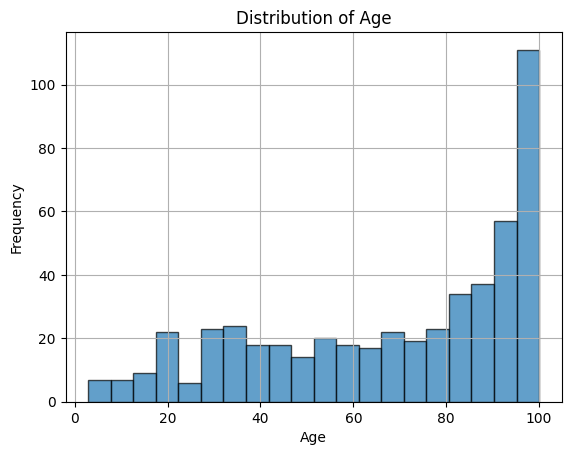

+-----------------+
|percentage_chas_1|
+-----------------+
| 6.91699604743083|
+-----------------+



In [17]:
#Task 4: Data Distribution Analysis
#Create a histogram showing the distribution of the "age" column.
#Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).
import matplotlib.pyplot as plt

#Task 4: Create a histogram showing the distribution of the "age" column
# Get the data for the "age" column
age_data = dataset.select("age").rdd.flatMap(lambda x: x).collect()

# Create a histogram
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Task 4: Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River)
task4_query_chas_percentage = """
SELECT
  (COUNT(*) / (SELECT COUNT(*) FROM bostonh.bos_housing)) * 100 AS percentage_chas_1
FROM bostonh.bos_housing
WHERE chas = 1
"""
# Execute Task 4 using spark.sql
spark.sql(task4_query_chas_percentage).show()

In [18]:
#Task 5: Correlation Analysis

#Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
#Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.

# Task 5: Calculate the correlation coefficient between "rm" and "medv"

task5_query_rm_medv = """
SELECT
  corr(rm, medv) AS correlation_rm_medv
FROM bostonh.bos_housing
"""
spark.sql(task5_query_rm_medv).show()

# Task 5: Calculate the correlation coefficient between "ptratio" and "nox"

task5_query_ptratio_nox = """
SELECT
  corr(ptratio,nox) AS correlation_ptratio_nox
FROM bostonh.bos_housing
"""
spark.sql(task5_query_ptratio_nox).show()

+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



In [19]:
#Task 6: Advanced Querying
#Task 6: Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").

# Execute the HiveQL query to get the top 5 neighborhoods with the highest "medv" values
task6_query_top5 = """
SELECT *
FROM bostonh.bos_housing
ORDER BY medv DESC
LIMIT 5
"""
# Execute Task 6 using spark.sql
spark.sql(task6_query_top5).show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [20]:
#Task 6: Advanced Querying
#Calculate and report the average property age for neighborhoods with "chas" value of 1
task6_query_chao_1= """
SELECT AVG(age) AS avg_property_age_chas_1
FROM bostonh.bos_housing
WHERE chas = 1;
"""
spark.sql(task6_query_chao_1).show()

#Calculate and report the average property age for neighborhoods with "chas" value of 0
task6_query_chao_0= """
SELECT AVG(age) AS avg_property_age_chas_0
FROM bostonh.bos_housing
WHERE chas = 0;
"""
spark.sql(task6_query_chao_0).show()

+-----------------------+
|avg_property_age_chas_1|
+-----------------------+
|      77.50000000000001|
+-----------------------+

+-----------------------+
|avg_property_age_chas_0|
+-----------------------+
|      67.91167728237794|
+-----------------------+



In [21]:
#Task 7: Visualization
#Create a Hive view named "property_age_view" that includes the "age" and "medv" columns
#drop_query = "DROP VIEW IF EXISTS property_age_view;"
#spark.sql(drop_query)

task7_query = """
CREATE VIEW property_age_view AS
SELECT age, medv
FROM bostonh.bos_housing;
"""
# Execute Task 7 using spark.sql
spark.sql(task7_query)

show_view_query = """
SELECT *
FROM property_age_view;
"""
# Execute Task 7 using spark.sql
spark.sql(show_view_query).show()

+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



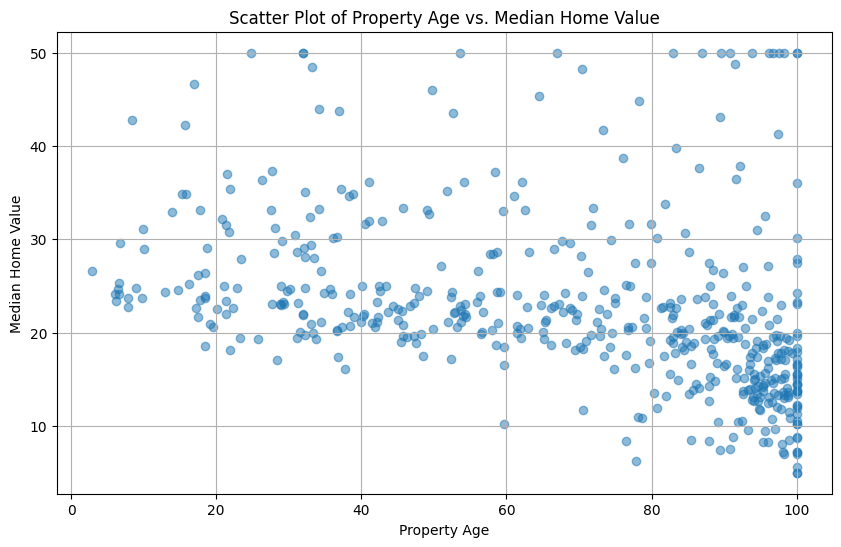

In [22]:
#Task 7: Visualization
#Plot a scatter plot of property age against median home value using a data visualization tool of your choice

# Extract the "age" and "medv" columns
age = dataset.select("age").rdd.flatMap(lambda x: x).collect()
medv = dataset.select("medv").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, medv, alpha=0.5)
plt.title("Scatter Plot of Property Age vs. Median Home Value")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.grid(True)
plt.show()

In [23]:
#Task 8: Outliers Detection
#Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
task8_query ="""
SELECT *
FROM bostonh.bos_housing
WHERE crim > 10;
"""
# Execute Task 8 using spark.sql
spark.sql(task8_query).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [24]:
#Task 9: Hypothesis Testing
#Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
#Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

#Hypothesis Formulation:
#Null Hypothesis (H0): There is no significant impact of the average number of rooms (rm) on median home value (medv).
#Alternative Hypothesis (H1): There is a significant impact of the average number of rooms (rm) on median home value (medv).

# Formulate the hypothesis
null_hypothesis = "There is no significant impact of the average number of rooms (rm) on median home value (medv)."
alternative_hypothesis = "There is a significant impact of the average number of rooms (rm) on median home value (medv)."

# Run a HiveQL query to calculate the t-score
query = """
    SELECT
        (SUM(rm * medv) - (SUM(rm) * SUM(medv)) / COUNT(*)) / (SQRT((SUM(rm * rm) - (SUM(rm) * SUM(rm)) / COUNT(*)) * (SUM(medv * medv) - (SUM(medv) * SUM(medv)) / COUNT(*))))
        AS t_score
    FROM bostonh.bos_housing
"""

# Execute the query
result = spark.sql(query)

# Collect the result
t_score = result.collect()[0]['t_score']

# Define the significance level (alpha)
alpha = 0.05
print(abs(t_score))
# Determine if the result is statistically significant
if abs(t_score) > alpha:
    print(f"Reject the null hypothesis. There is a significant impact of 'rm' on 'medv'.")
else:
    print(f"Fail to reject the null hypothesis. There is no significant impact of 'rm' on 'medv'.")


0.6953599470715358
Reject the null hypothesis. There is a significant impact of 'rm' on 'medv'.


In [25]:
#Task 9: Hypothesis Testing
#Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
#Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

#Hypothesis Formulation:
#Null Hypothesis (H0): There is no significant impact of the average number of rooms (rm) on median home value (medv).
#Alternative Hypothesis (H1): There is a significant impact of the average number of rooms (rm) on median home value (medv).

# Perform linear regression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Assemble the feature vector
assembler = VectorAssembler(inputCols=["rm"], outputCol="features")
data = assembler.transform(dataset)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="medv")

# Fit the model
lr_model = lr.fit(data)

# Get the p-value associated with the "rm" coefficient
summary = lr_model.summary
p_value = summary.pValues[0]

# Set the significance level
alpha = 0.05

# Perform a hypothesis test
if p_value < alpha:
    print(f"The p-value ({p_value}) is less than the significance level ({alpha}).")
    print("Reject the null hypothesis (H0) in favor of the alternative hypothesis (H1).")
    print("There is a statistically significant impact of 'rm' on 'medv'.")
else:
    print(f"The p-value ({p_value}) is greater than the significance level ({alpha}).")
    print("Fail to reject the null hypothesis (H0).")
    print("There is no statistically significant impact of 'rm' on 'medv'.")


The p-value (0.0) is less than the significance level (0.05).
Reject the null hypothesis (H0) in favor of the alternative hypothesis (H1).
There is a statistically significant impact of 'rm' on 'medv'.


In [25]:
spark.stop()